Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Programación de algoritmos de regresión

Presenta: Ana Maritza Bello

---

1. Random Forest
1. K-Nearest Neighbors
1. Neural Networks

---
1. Con datos propios
1. Aplicando reducción de variables
---

# Selección y evaluación de modelos

## Selección de modelos

La selección de modelos es una de las tareas más importantes en el proceso de
minería de datos. El objetivo es seleccionar el modelo que mejor se ajuste a los
datos y que al mismo tiempo sea simple y fácil de interpretar. La selección de
modelos es una tarea difícil porque los modelos más simples no siempre son los
que mejor se ajustan a los datos. Por ejemplo, un modelo lineal puede ser muy
simple pero no ajustarse bien a los datos. Por otro lado, un modelo muy complejo 
puede ajustarse muy bien a los datos pero ser difícil de interpretar.

La selección de modelos es un proceso iterativo que consiste en probar
diferentes modelos y evaluar su desempeño. El desempeño de un modelo se evalúa
con base en una medida de exactitud. La medida de exactitud más común es la
exactitud de clasificación. La exactitud de clasificación se define como el 
porcentaje de instancias clasificadas correctamente por el modelo. La exactitud
de clasificación se calcula con base en una matriz de confusión. La matriz de
confusión es una matriz que muestra el número de instancias clasificadas
correctamente e incorrectamente por el modelo. La matriz de confusión se
calcula con base en un conjunto de prueba.

## Evaluación de modelos

Para evaluar el desempeño de un modelo se utiliza un conjunto de prueba. El 
conjunto de prueba es un conjunto de instancias que no se utilizan para 
entrenar el modelo. El conjunto de prueba se utiliza para evaluar el desempeño 
del modelo. El conjunto de prueba debe ser representativo del conjunto de 
entrenamiento. El conjunto de prueba debe tener la misma distribución de
clases que el conjunto de entrenamiento.

# Técnicas para mejorar la exactitud de los modelos

La exactitud de los modelos se puede mejorar con las siguientes técnicas:

1. Selección de variables
1. Reducción de variables
1. Selección de modelos
1. Ajuste de parámetros

## Reducción de variables
En este proyecto se aplicó la técnica de reducción de variables.

# 0. Preparación de datos

La preparación de datos se realizó realizando las siguientes tareas:

1. Se adecuó un arreglo bidimensional para la variable salida.
1. Los datos categoricos se convirtieron a numéricos.
1. Se eliminaron las variables que no se utilizaron en el modelo.
1. Se eliminaron las instancias con valores faltantes.

In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('../data/trajectories.csv')
data = data.drop(['id'],axis = 1)

df = pd.DataFrame(data)

# Shuffle the data with numpy
df = df.reindex(np.random.permutation(df.index))

In [46]:
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['month'] = df['month'].astype(int)
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['year'] = df['year'].astype(int)

In [47]:
# Transform categorical variables into one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176767 entries, 115971 to 37824
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   name                          176767 non-null  object 
 1   spheroid_dist_to_colony       176767 non-null  float64
 2   sst                           176766 non-null  float64
 3   wnd_ucmp_height_above_ground  176767 non-null  float64
 4   wnd_vcmp_height_above_ground  176657 non-null  float64
 5   date                          176767 non-null  object 
 6   season                        176767 non-null  int64  
 7   latitude                      176767 non-null  float64
 8   longitude                     176767 non-null  float64
 9   month                         176767 non-null  int64  
 10  year                          176767 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 16.2+ MB


In [48]:
rows = df.isna().any(axis=1)
rows = rows[rows == True]
df.dropna(inplace=True)
rows = df.isna().any(axis=1)
df.isna().sum()

name                            0
spheroid_dist_to_colony         0
sst                             0
wnd_ucmp_height_above_ground    0
wnd_vcmp_height_above_ground    0
date                            0
season                          0
latitude                        0
longitude                       0
month                           0
year                            0
dtype: int64

## Matriz de correlación

La matriz de correralación se utilizó con el fin de identificar las variables
que tienen una correlación alta.

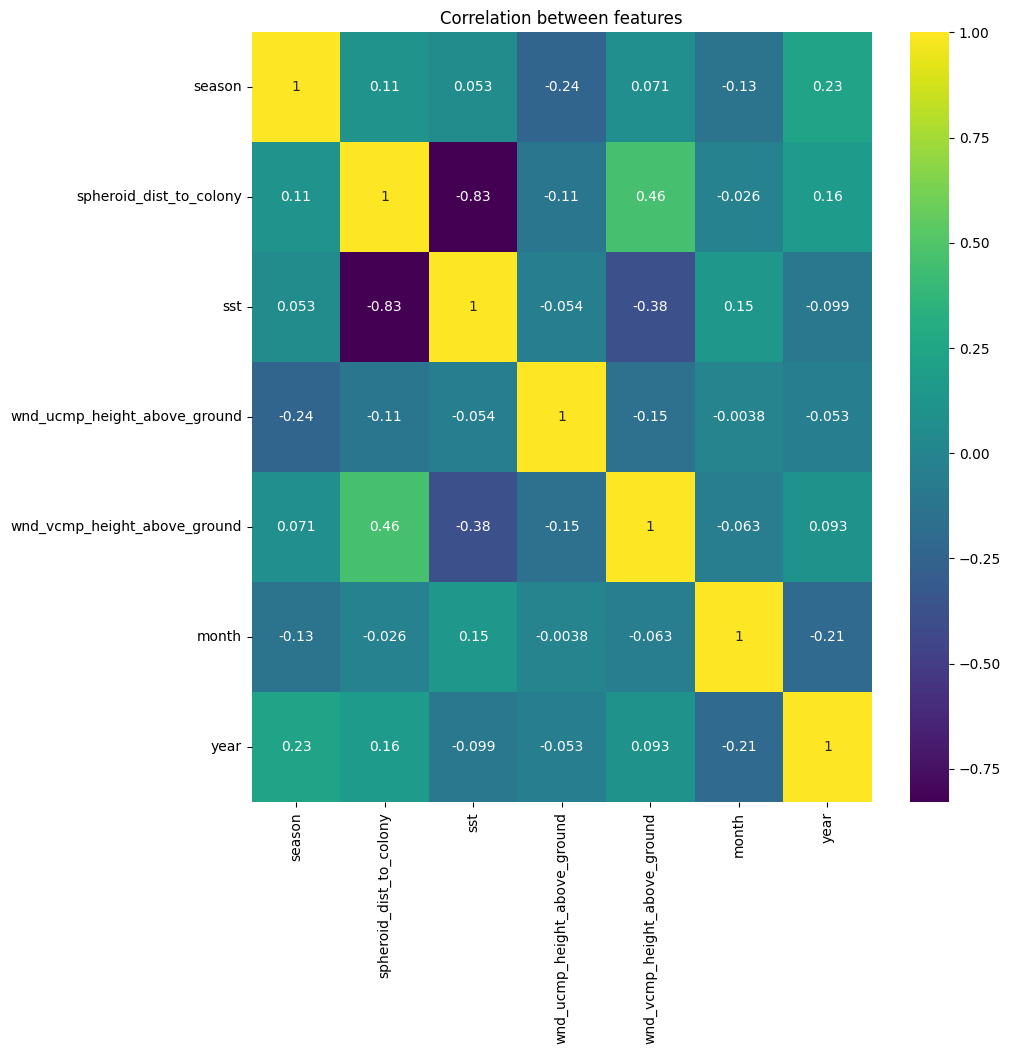

In [49]:
# Correlation between features
feature_cols = ['season', 'spheroid_dist_to_colony', 'sst', 'wnd_ucmp_height_above_ground', 'wnd_vcmp_height_above_ground', 'month', 'year']
corr = df[feature_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation between features')
plt.show()

# División de datos en conjuntos de entrenamiento y prueba

El conjunto de prueba es un conjunto de instancias que no se utilizan para
entrenar el modelo. El conjunto de prueba se utiliza para evaluar el desempeño 
del modelo. El conjunto de prueba se obtiene dividiendo el conjunto de datos en
dos partes: una parte para entrenar el modelo y otra parte para probar el
modelo.

La parte para entrenar el modelo se conoce como conjunto de entrenamiento y la
parte para probar el modelo se conoce como conjunto de prueba. El conjunto de
entrenamiento se utiliza para entrenar el modelo y el conjunto de prueba se
utiliza para evaluar el desempeño del modelo.

El conjunto de entrenamiento debe ser más grande que el conjunto de prueba. La
proporción entre el conjunto de entrenamiento y el conjunto de prueba depende
del tamaño del conjunto de datos. En general, el conjunto de entrenamiento debe
ser el 70% del conjunto de datos y el conjunto de prueba debe ser el 30% del
conjunto de datos.

Para este proyecto se utilizará una proporción de 80% para el conjunto de
entrenamiento y 20% para el conjunto de prueba.


In [50]:
from sklearn.model_selection import train_test_split

# Multitarget array
y = df[['longitude', 'latitude']].values

# Features
cols_to_drop = ['latitude', 'longitude', 'name', 'date']
X = df.drop(cols_to_drop, axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83, shuffle=True)

print(" X_train shape: ", X_train.shape, "\n",
      "y_train shape: ", y_train.shape, "\n",
      "X_test shape: ", X_test.shape, "\n",
      "y_test shape: ", y_test.shape)

 X_train shape:  (141324, 7) 
 y_train shape:  (141324, 2) 
 X_test shape:  (35332, 7) 
 y_test shape:  (35332, 2)


# Modelos de regresión

El problema de regresión consiste en predecir el valor de una variable numérica
a partir de los valores de otras variables numéricas. Particularmente en este
proyecto se presenta un problema de **regresión multi-salida**. Esto significa
que se tienen varias variables de salida. Dado que se pretende predecir el valor
de un punto en el espacio, se tienen dos variables de salida: la coordenada _x_
que es la longitud y la coordenada _y_ que es la latitud.

Para resolver el problema de regresión multi-salida se utilizó un módulo de 
Python llamado **sklearn.multioutput**. Este módulo contiene varios algoritmos
de regresión multi-salida. En este proyecto se utilizaron los siguientes:

1. Random Forest Regressor
1. K-Neighbors Regressor
1. Neural Network Regressor

## Modelo de multi-salida usando el algoritmo de Random Forest


In [51]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

multioutput_model_RF = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=12, random_state=83))
multioutput_model_RF.fit(X_train, y_train)
y1_pred = multioutput_model_RF.predict(X_test)


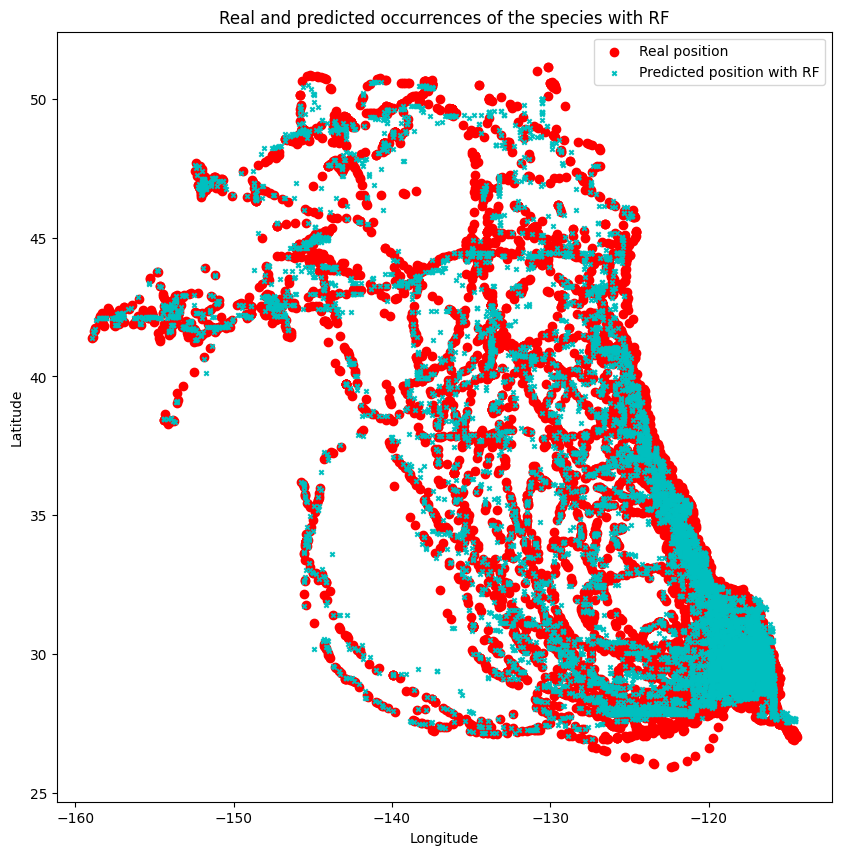

In [52]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y1_pred[:, 0], y1_pred[:, 1], c='c', label='Predicted position with RF', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with RF')
plt.legend()

## Modelo de multi-salida usando el algoritmo de K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsRegressor

multioutput_model_KNN = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))
multioutput_model_KNN.fit(X_train, y_train)
y3_pred = multioutput_model_KNN.predict(X_test)

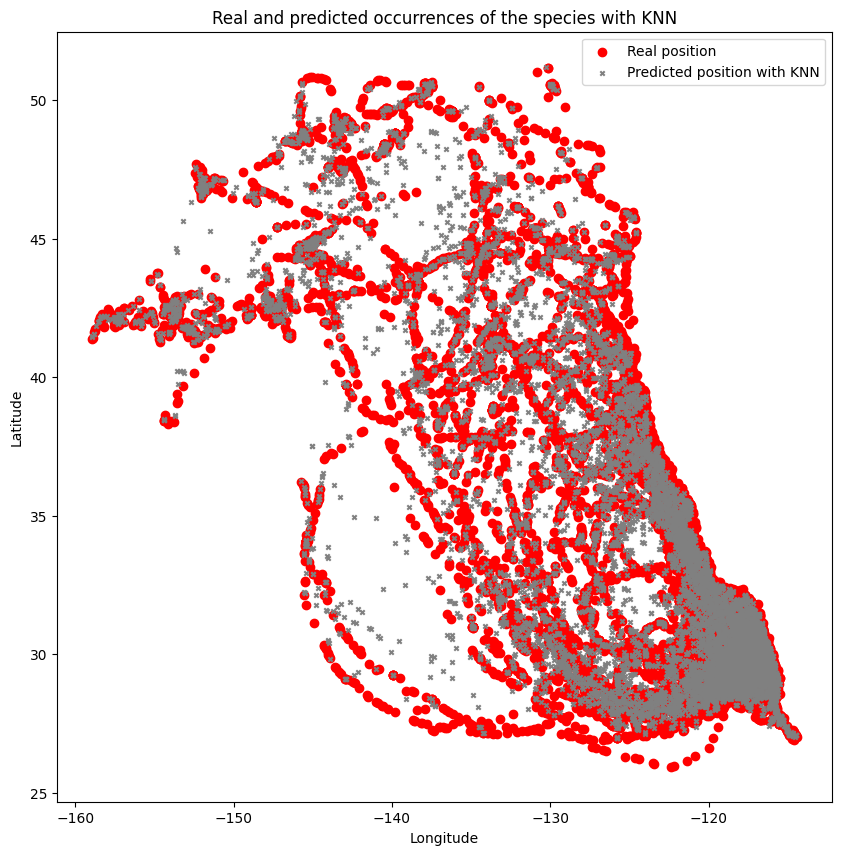

In [54]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y3_pred[:, 0], y3_pred[:, 1], c='gray', label='Predicted position with KNN', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with KNN')
plt.legend()

## Modelo de multi-salida usando una red neuronal

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# Crear modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
4417/4417 [==============================] - 3s 718us/step - loss: 333.1905
Epoch 2/50
4417/4417 [==============================] - 3s 726us/step - loss: 3.3100
Epoch 3/50
4417/4417 [==============================] - 3s 730us/step - loss: 2.5762
Epoch 4/50
4417/4417 [==============================] - 3s 715us/step - loss: 1.7665
Epoch 5/50
4417/4417 [==============================] - 3s 728us/step - loss: 1.4549
Epoch 6/50
4417/4417 [==============================] - 3s 722us/step - loss: 1.2399
Epoch 7/50
4417/4417 [==============================] - 3s 728us/step - loss: 1.0939
Epoch 8/50
4417/4417 [==============================] - 3s 722us/step - loss: 1.0397
Epoch 9/50
4417/4417 [==============================] - 3s 728us/step - loss: 0.9776
Epoch 10/50
4417/4417 [==============================] - 3s 724us/step - loss: 0.9037
Epoch 11/50
4417/4417 [==============================] - 3s 716us/step - loss: 0.8620
Epoch 12/50
4417/4417 [==============================] - 3s 7

1105/1105 [==============================] - 1s 605us/step - loss: 0.5183
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2658 (10.38 KB)
Trainable params: 2658 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1105/1105 [==============================] - 1s 610us/step


Text(0.5, 1.0, 'Real and predicted occurrences of the species with NN')

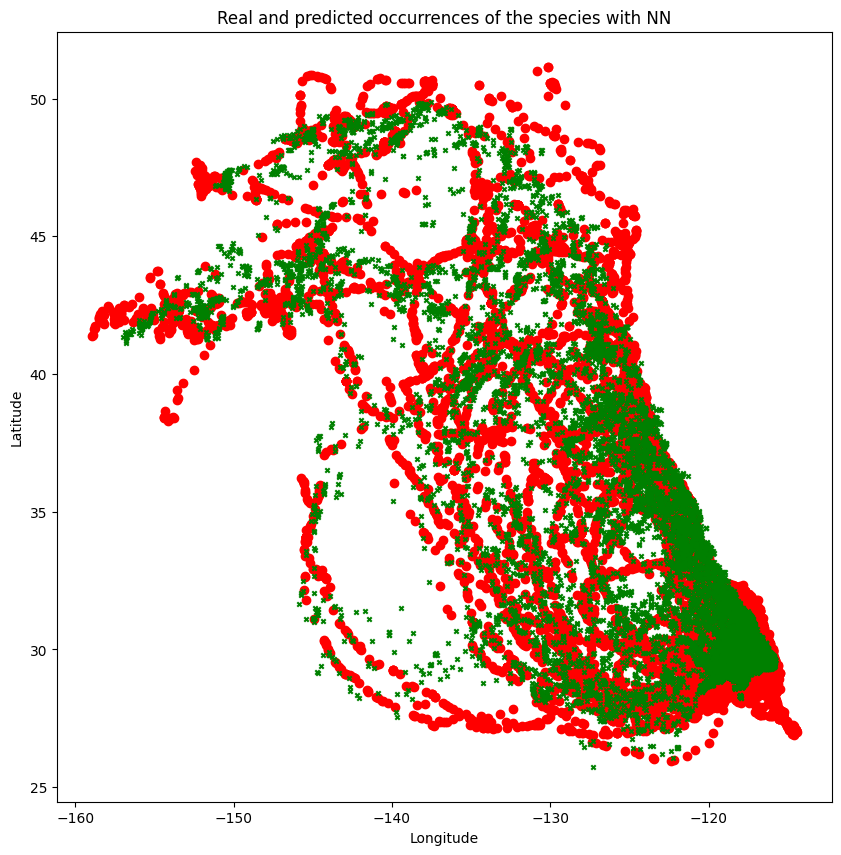

In [56]:
model.evaluate(X_test, y_test, verbose=1)
model.summary()

y4_pred = model.predict(X_test)

plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y4_pred[:, 0], y4_pred[:, 1], c='green', label='Predicted position', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with NN')

# Evaluación de modelos

Las medidas de exactitud que se utilizaron para evaluar los modelos fueron:

1. **Error absoluto medio**. El error absoluto medio se define como la media de
los errores absolutos. El error absoluto se define como la diferencia entre el
valor real y el valor predicho. El error absoluto medio se calcula con base en
el conjunto de prueba.
1. **Error cuadrático medio**. El error cuadrático medio se define como la media
de los errores cuadráticos. El error cuadrático se define como el cuadrado de la
diferencia entre el valor real y el valor predicho. El error cuadrático medio se
calcula con base en el conjunto de prueba.
1. **Coeficiente de determinación**. El coeficiente de determinación se define
como la proporción de la varianza total de la variable de salida que es
explicada por el modelo. El coeficiente de determinación se calcula con base en
el conjunto de prueba.

In [57]:
# Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Evaluate MSE and plot results for each model

print('MSE for RF: ', mean_squared_error(y_test, y1_pred))
print('MSE for KNN: ', mean_squared_error(y_test, y3_pred))
print('MSE for NN: ', mean_squared_error(y_test, y4_pred))
print("\n")
print('MAE for RF: ', mean_absolute_error(y_test, y1_pred))
print('MAE for KNN: ', mean_absolute_error(y_test, y3_pred))
print('MAE for NN: ', mean_absolute_error(y_test, y4_pred))
print("\n")
print('R2 for RF: ', r2_score(y_test, y1_pred))
print('R2 for KNN: ', r2_score(y_test, y3_pred))
print('R2 for NN: ', r2_score(y_test, y4_pred))

MSE for RF:  0.09084395357748809
MSE for KNN:  0.3964084989612001
MSE for NN:  0.5183120435811076


MAE for RF:  0.14578840232861057
MAE for KNN:  0.1949445352824655
MAE for NN:  0.42679476964871976


R2 for RF:  0.9969245973447735
R2 for KNN:  0.9857955456766376
R2 for NN:  0.9826552306732791


# Análisis de componentes principales

El análisis de componentes principales es una técnica de reducción de variables.
El análisis de componentes principales se utiliza para reducir el número de
variables de un conjunto de datos. 

Para este proyecto se utilizó el módulo de Python llamado
**sklearn.decomposition**.

Los componentes principales se calcularon con base en el conjunto de
entrenamiento se estableció que el número de componentes principales es 2.

## Resultados

In [58]:
# Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Modelo de multi-salida usando el algoritmo de Random Forest con PCA

In [59]:
# Random Forest
multioutput_model_RF.fit(X_train_pca, y_train)
y1_pred_pca = multioutput_model_RF.predict(X_test_pca)


## Modelo de multi-salida usando el algoritmo de K-Nearest Neighbors con PCA

In [60]:
# KNN
multioutput_model_KNN.fit(X_train_pca, y_train)
y3_pred_pca = multioutput_model_KNN.predict(X_test_pca)

## Modelo de multi-salida usando una red neuronal con PCA

In [61]:
# NN
X_train_pca.shape
model = Sequential()
model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train_pca, y_train, epochs=50, batch_size=32, verbose=1)
model.evaluate(X_test_pca, y_test, verbose=1)
y4_pred_pca = model.predict(X_test_pca)


Epoch 1/50
4417/4417 [==============================] - 3s 711us/step - loss: 380.0607
Epoch 2/50
4417/4417 [==============================] - 3s 723us/step - loss: 18.6575
Epoch 3/50
4417/4417 [==============================] - 3s 713us/step - loss: 14.0599
Epoch 4/50
4417/4417 [==============================] - 3s 713us/step - loss: 6.8783
Epoch 5/50
4417/4417 [==============================] - 3s 707us/step - loss: 6.4854
Epoch 6/50
4417/4417 [==============================] - 3s 713us/step - loss: 6.1132
Epoch 7/50
4417/4417 [==============================] - 3s 724us/step - loss: 5.3354
Epoch 8/50
4417/4417 [==============================] - 3s 720us/step - loss: 4.3666
Epoch 9/50
4417/4417 [==============================] - 3s 724us/step - loss: 3.9791
Epoch 10/50
4417/4417 [==============================] - 3s 715us/step - loss: 3.9186
Epoch 11/50
4417/4417 [==============================] - 3s 754us/step - loss: 3.6215
Epoch 12/50
4417/4417 [==============================] - 3s

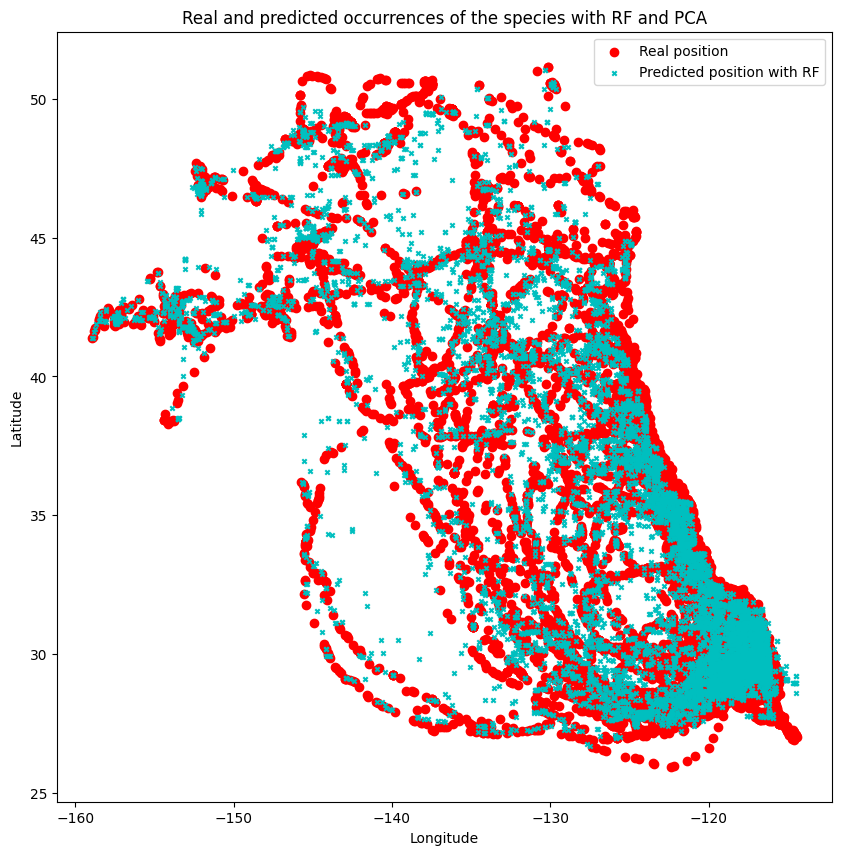

In [62]:
# Plot results
plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y1_pred_pca[:, 0], y1_pred_pca[:, 1], c='c', label='Predicted position with RF', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with RF and PCA')
plt.legend()


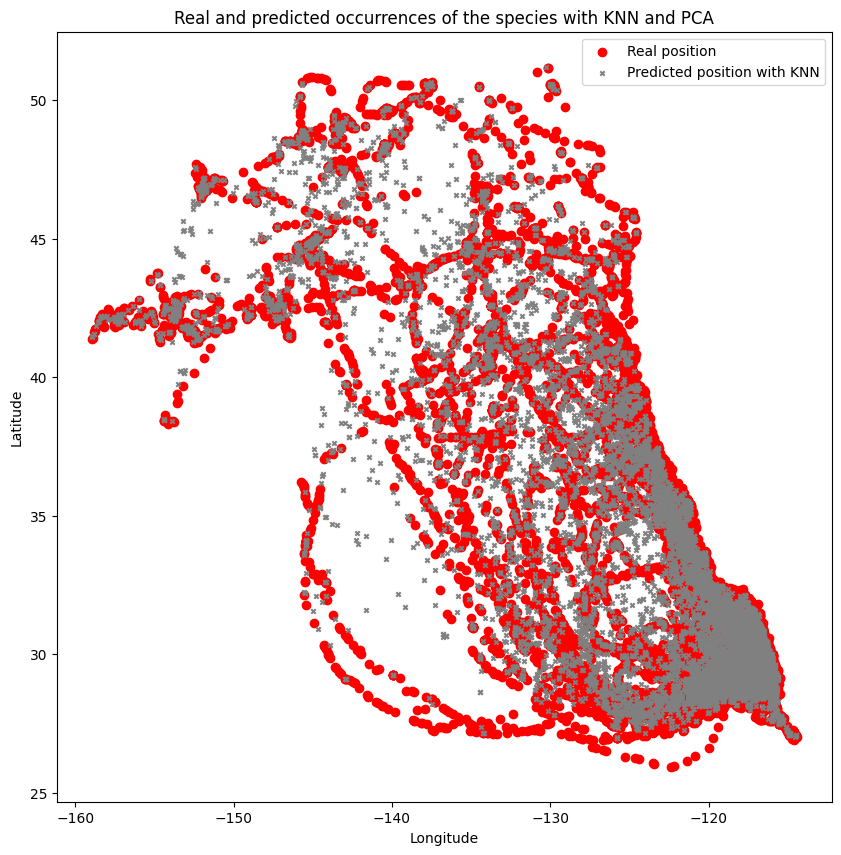

In [63]:
# Plot results
plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y3_pred_pca[:, 0], y3_pred_pca[:, 1], c='gray', label='Predicted position with KNN', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with KNN and PCA')
plt.legend()

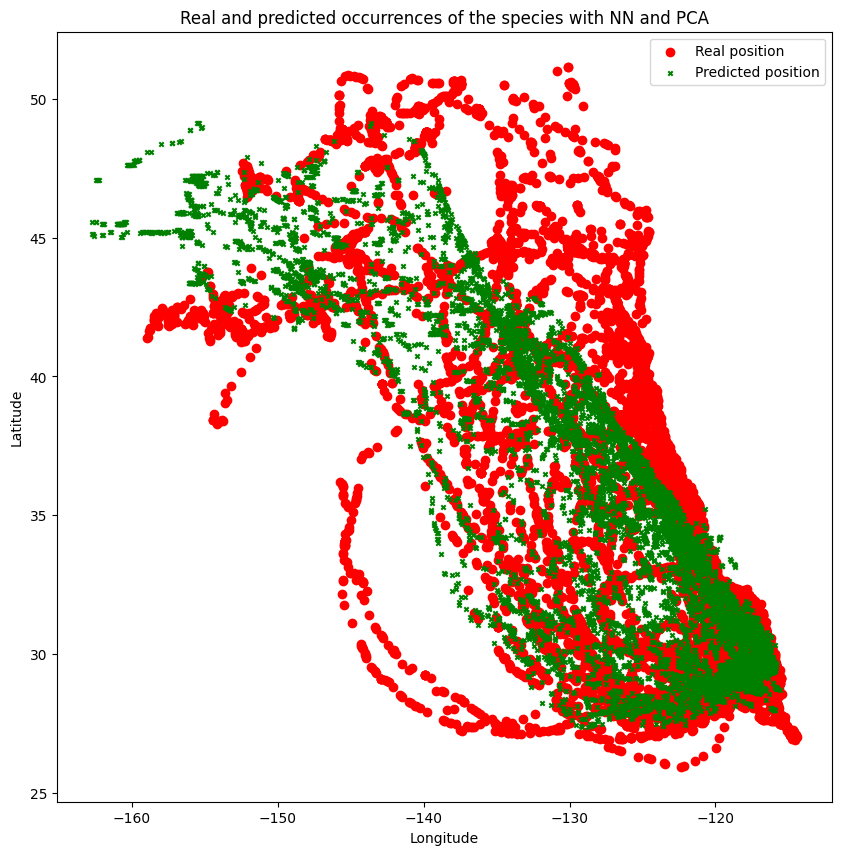

In [64]:
# Plot results
plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test[:, 1], c='red', label='Real position')
plt.scatter(y4_pred_pca[:, 0], y4_pred_pca[:, 1], c='green', label='Predicted position', s=10, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Real and predicted occurrences of the species with NN and PCA')
plt.legend()


## Resultados de la evaluación de modelos de regresión con reducción de variables

In [65]:
# Table with results for each model

from prettytable import PrettyTable

table = PrettyTable(['Model', 'MSE', 'MAE', 'R2'])
table.add_row(['RF', mean_squared_error(y_test, y1_pred), mean_absolute_error(y_test, y1_pred), r2_score(y_test, y1_pred)])
table.add_row(['KNN', mean_squared_error(y_test, y3_pred), mean_absolute_error(y_test, y3_pred), r2_score(y_test, y3_pred)])
table.add_row(['NN', mean_squared_error(y_test, y4_pred), mean_absolute_error(y_test, y4_pred), r2_score(y_test, y4_pred)])
table.add_row(['RF + PCA', mean_squared_error(y_test, y1_pred_pca), mean_absolute_error(y_test, y1_pred_pca), r2_score(y_test, y1_pred_pca)])
table.add_row(['KNN + PCA', mean_squared_error(y_test, y3_pred_pca), mean_absolute_error(y_test, y3_pred_pca), r2_score(y_test, y3_pred_pca)])
table.add_row(['NN + PCA', mean_squared_error(y_test, y4_pred_pca), mean_absolute_error(y_test, y4_pred_pca), r2_score(y_test, y4_pred_pca)])
print(table)


+-----------+---------------------+---------------------+--------------------+
|   Model   |         MSE         |         MAE         |         R2         |
+-----------+---------------------+---------------------+--------------------+
|     RF    | 0.09084395357748809 | 0.14578840232861057 | 0.9969245973447735 |
|    KNN    |  0.3964084989612001 |  0.1949445352824655 | 0.9857955456766376 |
|     NN    |  0.5183120435811076 | 0.42679476964871976 | 0.9826552306732791 |
|  RF + PCA |  0.3081085205346599 |  0.2506117571605461 | 0.9887525694736983 |
| KNN + PCA |  0.8872339422397275 |  0.3111302763868441 | 0.966552647687916  |
|  NN + PCA |  2.4382515165190597 |  0.963599321324198  | 0.9217342898337536 |
+-----------+---------------------+---------------------+--------------------+


# Conclusiones

El modelo que mejor se ajusta a los datos es el modelo de regresión multi-salida
con el algoritmo de Random Forest. El modelo de regresión multi-salida con el
algoritmo de Random Forest tiene un error absoluto medio de 0.1438, un error 
cuadrático medio de 0.091 y un coeficiente de determinación de 0.996.

Sin embargo, el modelo de regresión multi-salida con el algoritmo de K-Nearest
también se ajusta bien a los datos. El modelo de regresión multi-salida con el
algoritmo de K-Nearest tiene un error absoluto medio de 0.19, un error
cuadrático medio de 0.36 y un coeficiente de determinación de 0.9871.

La Red Neutonal obtuvo buenos resultados sin la reducción de variables, pero
con la reducción de variables los resultados no fueron buenos.
